In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import ast 
from plotly.subplots import make_subplots

pio.templates.default = "seaborn"

In [2]:
main_directory = 'data/'
data_path  = os.path.join(main_directory, 'combined_df.csv')
analysis_path  = os.path.join(main_directory, 'analysis')

complete_data = pd.read_csv(data_path)
clustered_df = pd.read_csv(os.path.join(analysis_path,  'files_with_cluster_labels.csv'))
complete_data.shape, clustered_df.shape

((5309, 202), (4903, 9))

In [3]:
merged_data = pd.merge(complete_data, clustered_df[['full_name', 'cluster_label', 'cluster_names']], on='full_name', how='left')

final_data = merged_data.dropna(subset=['cluster_label'])

final_data['cluster_label'] = final_data['cluster_label'].astype(int)

final_data.reset_index(inplace=True, drop=True)

final_data.shape

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\3571545994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['cluster_label'] = final_data['cluster_label'].astype(int)


(4903, 204)

In [4]:
commits_directory = os.path.join('data','commits')
commits_files = [f for f in os.listdir(commits_directory) if os.path.isfile(os.path.join(commits_directory, f))]

In [5]:
len(commits_files)

40

In [6]:
def extract_full_name_from_contributors(filename):
    parts = filename.split('_')
    username = parts[1]
    repo_name = '_'.join(parts[3:]).replace('_contributors.csv', '')
    return f"{username}/{repo_name}"
    
def extract_full_name_from_commits(filename):
    parts = filename.split('_')
    username = parts[1]
    repo_name = '_'.join(parts[3:]).replace('_commits.csv', '')
    return f"{username}/{repo_name}"

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [7]:
contributors_count = {}
total_contributions = {}
active_days = {}
commits_info = {}

for file in commits_files:
    full_name = extract_full_name_from_commits(file) 
    file_path = os.path.join(commits_directory, file)
    content = pd.read_csv(file_path)
    content['commit.author.date'] = pd.to_datetime(content['commit.author.date'])
    content['date'] = content['commit.author.date'].dt.date
    unique_dates_set = set(content['date'])
    unique_contributors = set(content['author.login'])
    number_of_active_days = int(len(unique_dates_set))
    number_of_contributors = len(unique_contributors)
    total_contributions_number = content.shape[0]
    
    active_days[full_name] = number_of_active_days
    contributors_count[full_name] = number_of_contributors
    total_contributions[full_name] = total_contributions_number    
    
    grouped_data = content.groupby(['author.login', 'commit.author.date']).size().reset_index(name='total_commits')
    commits_info[full_name] = {}

    for index, row in grouped_data.iterrows():
        author = row['author.login']
        date = row['commit.author.date']
        total_commits = row['total_commits']
    
        if author not in commits_info[full_name]:
            commits_info[full_name][author] = []
        commits_info[full_name][author].append((date, total_commits))


final_data['total_contributions'] = final_data['full_name'].map(total_contributions)

final_data['contributors_count'] = final_data['full_name'].map(contributors_count)

final_data['active_days'] = final_data['full_name'].map(active_days)

final_data['commit_info'] = final_data['full_name'].map(commits_info)

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\3516367585.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['total_contributions'] = final_data['full_name'].map(total_contributions)
C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\3516367585.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['contributors_count'] = final_data['full_name'].map(contributors_count)
C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\3516367585.py:39: SettingWithCopyWarning: 
A value is trying

In [8]:
final_data[['total_contributions','contributors_count', 'active_days', 'commit_info']]

,total_contributions,contributors_count,active_days,commit_info
0,2374.0,24.0,1050.0,"{'MSamman': [(2022-09-13 11:15:15+00:00, 1), (..."
1,4667.0,110.0,1585.0,"{'AxVE': [(2018-01-16 22:07:42+00:00, 1)], 'Ay..."
2,39.0,9.0,18.0,{'Eduardo-Morales-Alberti': [(2018-01-01 22:13...
3,55.0,5.0,25.0,{'AlessandroSteri': [(2019-03-07 11:36:59+00:0...
4,2142.0,74.0,809.0,"{'38': [(2017-12-30 00:04:47+00:00, 1), (2017-..."
...,...,...,...,...
4898,NaN,NaN,NaN,NaN
4899,NaN,NaN,NaN,NaN
4900,NaN,NaN,NaN,NaN
4901,NaN,NaN,NaN,NaN


In [9]:
final_data.loc[final_data['contributors_count'] == 0, ['contributors_count', 'total_contributions']] = np.nan

In [10]:
# final_data = final_data[~final_data['contributors_count'].isna()]
final_data.shape

(4903, 208)

In [11]:
final_data.to_csv('data/final_data.csv', index=False)

## Popularity Analysis
### Objective: Evaluate the popularity (e.g., stars, forks, subscribers) of repositories within each cluster to identify which clusters contain the most active or popular workflows.

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\3276575151.py:59: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(f'Max: {max_val:.1f}', xy=max_annotations[i],


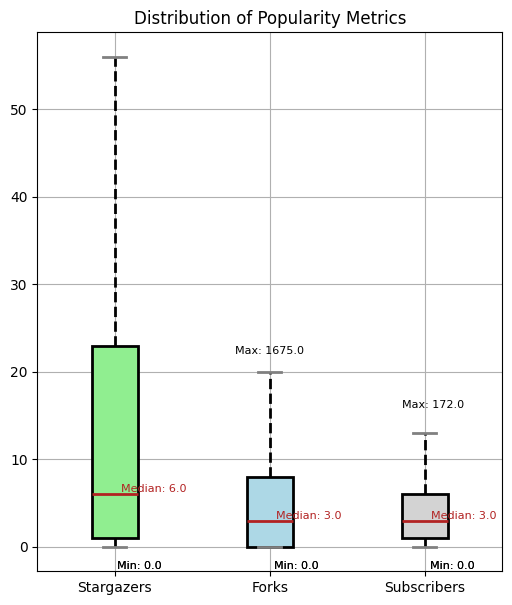

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming final_data is a DataFrame and has already been defined
x0 = np.array(final_data['stargazers_count'])
x1 = np.array(final_data['forks_count'])
x2 = np.array(final_data['subscribers_count'])

# Data to be plotted
data = [x0, x1, x2]
labels = ['Stargazers', 'Forks', 'Subscribers']

# Creating a figure instance
fig, ax = plt.subplots(figsize=(6,7))

# Creating the boxplot without displaying outliers
boxprops = dict(linestyle='-', linewidth=2, color='k', facecolor='lightblue')
flierprops = dict(marker='o', color='red', alpha=0.5)
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='grey')

bp = ax.boxplot(data, patch_artist=True, showfliers=False,
                boxprops=boxprops, medianprops=medianprops,
                whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

# Setting x-axis labels
ax.set_xticklabels(labels)

# Colors for each box
colors = ['lightgreen', 'lightblue', 'lightgrey']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Annotating Max, Min, Median
max_annotations = [(0.45, 0.95), (0.5, 0.4), (0.85, 0.3)]  # Predefined positions for Max value annotations
for i, (line, dataset) in enumerate(zip(bp['medians'], data)):
    x, y = line.get_xydata()[1]  # top of median line
    ax.annotate(f'Median: {y:.1f}', xy=(x, y), xytext=(x+0.1, y),
                textcoords='data', ha='center', va='bottom', fontsize=8, color='firebrick')

    # Annotating min and max values directly from the data
    min_val = np.min(dataset)
    max_val = np.max(dataset)

    ax.annotate(f'Min: {min_val:.1f}', xy=(x, min_val), xytext=(x, min_val - 10),
                textcoords='offset points', ha='center', va='top', fontsize=8, color='black')

    # Use predefined positions for max annotations
    ax.annotate(f'Max: {max_val:.1f}', xy=(x, max_val), xytext=max_annotations[i],
                textcoords='axes fraction', ha='center', va='bottom', fontsize=8, color='black')

    # Annotating min and max values directly from the data
    min_val = np.min(dataset)
    max_val = np.max(dataset)

    ax.annotate(f'Min: {min_val:.1f}', xy=(x, min_val), xytext=(x, min_val - 10),
                textcoords='offset points', ha='center', va='top', fontsize=8, color='black')
    ax.annotate(f'Max: {max_val:.1f}', xy=max_annotations[i],
                textcoords='axes fraction', ha='center', va='bottom', fontsize=8, color='black')

# Display the plot
plt.title('Distribution of Popularity Metrics')
plt.grid()
plt.show()


In [13]:
# cluster_summary = final_data.groupby('cluster_label').agg({
#     'stargazers_count': ['mean', 'sum'],
#     'forks_count': ['mean', 'sum'],
#     'subscribers_count': ['mean', 'sum'],
# }).reset_index()

# cluster_summary.columns = [' '.join(col).strip() for col in cluster_summary.columns.values]

# cluster_summary.sort_values(by='stargazers_count sum',ascending=False).describe(percentiles=[ 0.01, 0.05, 0.1, 0.15, 0.19, 0.2, 0.25, 0.75, 0.9,00.95,0.99])

In [14]:
# fig = make_subplots(rows=2, cols=1, shared_yaxes=True)
# fig.update_layout(width=1000, height=700)

# stars_box = px.box(cluster_summary, x="stargazers_count sum")
# fig.add_trace(stars_box.data[0], row=1, col=1)
# fig.update_yaxes(title_text="Stars Total", row=1, col=1)

# forks_box = px.box(cluster_summary, x="stargazers_count mean")
# fig.add_trace(forks_box.data[0], row=2, col=1)
# fig.update_yaxes(title_text="Stars Mean", row=2, col=1)

# cluster_with_less_stars = cluster_summary[cluster_summary['stargazers_count sum'] < 50]
# cluster_with_less_stars

In [15]:
# len(final_data[final_data['cluster_label']== cluster_with_less_stars['cluster_label'].values[0]])

In [16]:
# cluster_with_more_stars = cluster_summary[cluster_summary['stargazers_count sum'] > 8000]
# cluster_with_more_stars

In [17]:
stars_threshold = final_data['stargazers_count'].median()
forks_threshold = final_data['forks_count'].median()
subscribers_threshold = final_data['subscribers_count'].median()

def calculate_metrics(group):
    total_repos = len(group)
    # Using bitwise OR `|` with parentheses around each condition
    popular_repos = group[(group['stargazers_count'] > stars_threshold) | 
                          (group['forks_count'] > forks_threshold) | 
                          (group['subscribers_count'] > subscribers_threshold)]
    transient_repos = group[~group.index.isin(popular_repos.index)]

    return pd.Series([total_repos, len(popular_repos), len(transient_repos)], 
                     index=['total_repos', 'popular_respositories', 'transient_respositories'])

cluster_metrics = final_data.groupby('cluster_label').apply(calculate_metrics).reset_index()
cluster_metrics.set_index('cluster_label', inplace=True)

In [18]:
cluster_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   total_repos              98 non-null     int64
 1   popular_respositories    98 non-null     int64
 2   transient_respositories  98 non-null     int64
dtypes: int64(3)
memory usage: 2.7 KB


## Cohen's $d$ 

Cohen's 𝑑 is a statistic used to measure the effect size, or the strength of the relationship between two variables in a quantitative manner. The value can be interpreted as follows:

A small effect size is typically around 0.2,
A medium effect size is around 0.5,
A large effect size is 0.8 and above.

is calculated as follows:

$$
d = \frac{\overline{x}_1 - \overline{x}_2}{s}
$$

where:

- $\overline{x}_1$ and $\overline{x}_2$ are the means of the two groups.
- $s$ is the pooled standard deviation, which is calculated using the formula:

$$
s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$

In this formula:

- $n_1$ and $n_2$ are the sample sizes of the two groups.
- $s_1$ and $s_2$ are the standard deviations of the two groups.

In [19]:
import numpy as np

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

# Calculate Cohen's d between pairs
# d_pop_avg = cohen_d(cluster_metrics['popular_respositories'], cluster_metrics['avg_respositories'])
d_pop_trans = cohen_d(cluster_metrics['popular_respositories'], cluster_metrics['transient_respositories'])
# d_avg_trans = cohen_d(cluster_metrics['avg_respositories'], cluster_metrics['transient_respositories'])

# print("Cohen's d between Popular and Average Repositories: ", d_pop_avg)
print("Cohen's d between Popular and Transient Repositories: ", d_pop_trans)
# print("Cohen's d between Average and Transient Repositories: ", d_avg_trans)


Cohen's d between Popular and Transient Repositories:  0.7837742795931503


Given the Cohen's 𝑑 values you've reported:

Popular vs. Average Repositories: 0.968 - This indicates a large effect size. The mean of the popular repositories is significantly different from that of the average repositories, and the difference is substantial. This implies that popular repositories tend to have much different characteristics compared to average repositories.

Popular vs. Transient Repositories: -0.261 - This suggests a small negative effect size. The negative sign indicates that the mean of popular repositories is lower than the mean of transient repositories. However, the magnitude of the difference is small, suggesting that while there is a measurable difference, it is not particularly strong.

Average vs. Transient Repositories: -1.365 - This value indicates a very large effect size, and again, the negative sign shows that the mean of the average repositories is substantially lower than the mean of transient repositories. This suggests a very strong difference in characteristics between average and transient repositories.

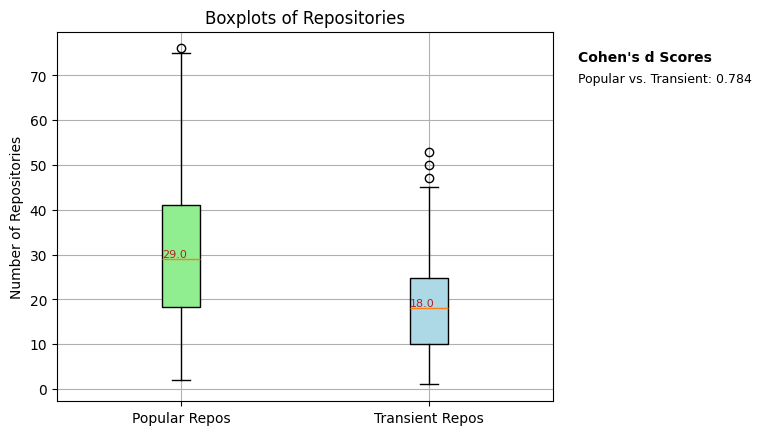

In [20]:

data_to_plot = cluster_metrics[['popular_respositories',  'transient_respositories']]

# Create a figure and an axes.
fig, ax = plt.subplots()

# Boxplot of the data
box = ax.boxplot(data_to_plot, patch_artist=True)

# Setting titles and labels
ax.set_title('Boxplots of Repositories')
ax.set_ylabel('Number of Repositories')
ax.set_xticklabels(['Popular Repos', 'Transient Repos'])

# Colors for each box
colors = ['lightgreen', 'lightblue', 'lightgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Annotate some key values in the boxplot
for i, line in enumerate(box['medians']):
    x, y = line.get_xydata()[1]  # get position data for median line
    ax.annotate(f'{y:.1f}', xy=(x, y), xytext=(x-0.1, y),
                textcoords='data', ha='center', va='bottom',  fontsize=8, color='firebrick')

# Add Cohen's d values and a title
cohens_d_values = {
    # 'Popular vs. Average': d_pop_avg,
    'Popular vs. Transient': d_pop_trans,
    # 'Average vs. Transient': d_avg_trans
}
# Place Cohen's d values in the top right corner
text_x = 1.05  # slightly right of the rightmost box
text_y_start = 0.95  # start near the top of the axes

# Add a title for the Cohen's d values
ax.text(text_x, text_y_start, "Cohen's d Scores", transform=ax.transAxes, ha="left", va="top", fontweight='bold', fontsize=10)
text_y_start -= 0.06  # move down from the title to start listing scores

for label, value in cohens_d_values.items():
    ax.text(text_x, text_y_start, f"{label}: {value:.3f}", transform=ax.transAxes, ha="left", va="top", fontsize=9)
    text_y_start -= 0.05  # move each subsequent line down a bit

# Show the plot
plt.grid(True)
plt.show()


In [21]:

popular_repos = final_data[(final_data['stargazers_count'] > stars_threshold) | 
                      (final_data['forks_count'] > forks_threshold) | 
                      (final_data['subscribers_count'] > subscribers_threshold)]
transient_repos = final_data[~final_data.index.isin(popular_repos.index)]

In [22]:
round(popular_repos.shape[0]/final_data.shape[0]*100,2), round(transient_repos.shape[0]/final_data.shape[0]*100,2), popular_repos.shape[0], transient_repos.shape[0]

(61.68, 38.32, 3024, 1879)

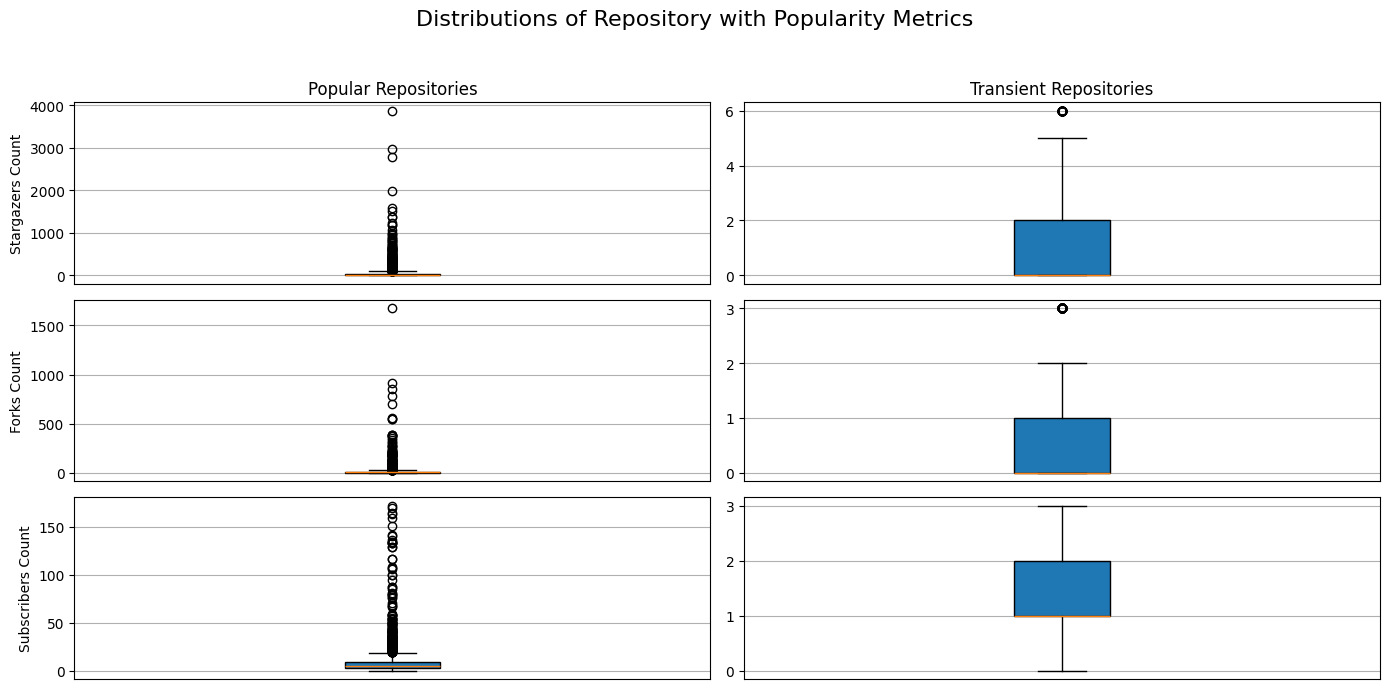

In [23]:
# Assuming metrics, repos_types, and repos_labels are already defined
metrics = ['stargazers_count', 'forks_count', 'subscribers_count']
repos_types = [popular_repos, transient_repos,]
repos_labels = ['Popular Repositories', 'Transient Repositories']

# Create a figure with subplots - 3 columns (one for each repo type) x 3 rows (one for each metric)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))  # Adjust the size as necessary

# Set a title for the figure
fig.suptitle('Distributions of Repository with Popularity Metrics', fontsize=16)

# Plot each boxplot
for i, metric in enumerate(metrics):
    for j, repo_type in enumerate(repos_types):
        axes[i, j].boxplot(repo_type[metric], patch_artist=True)
        if i == 0:
            # Only set titles for the top row
            axes[i, j].set_title(repos_labels[j])
        if j == 0:
            # Only set y-labels for the first column
            axes[i, j].set_ylabel(f'{metric.replace("_", " ").title()}')
        axes[i, j].grid(True)
        axes[i, j].set_xticks([])  # Disable x-ticks as requested

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rectangle in which to fit subplots

# Show the plot
plt.show()

In [24]:
# repo_counts_per_cluster = popular_repos['cluster_label'].value_counts().sort_index()

# plt.figure(figsize=(15, 6))
# repo_counts_per_cluster.plot(kind='bar')
# plt.xlabel('Cluster Label')
# plt.ylabel('Number of Repositories')
# plt.title('Distribution of Popular Repositories Across Clusters')
# plt.grid(True)
# plt.xticks(fontsize=8, rotation=90)
# plt.show()

In [25]:
# popular_repos[['stargazers_count', 'forks_count']].describe()

In [26]:
# dead_repos[['stargazers_count', 'forks_count']].describe()

In [27]:
# average_repos[['stargazers_count', 'forks_count']].describe()

In [28]:
# repo_counts_per_cluster = dead_repos['cluster_label'].value_counts().sort_index()

# plt.figure(figsize=(15, 6))
# repo_counts_per_cluster.plot(kind='bar')
# plt.xlabel('Cluster Label')
# plt.ylabel('Number of Repositories')
# plt.title('Distribution of Dead Repositories Across Clusters')
# plt.grid(True)
# plt.xticks(fontsize=8, rotation=90)
# plt.show()

In [30]:
popular_repos.to_csv('data/analysis/popular_df.csv', index=False)
transient_repos.to_csv('data/analysis/transient_repos.csv', index=False)
# average_repos.to_csv('data/analysis/avg_df.csv', index=False)

## Activity Analysis
### Objective: Evaluate the activity (e.g., contributors, issues, commits) of repositories within each cluster to identify how happening active repositories are.

C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


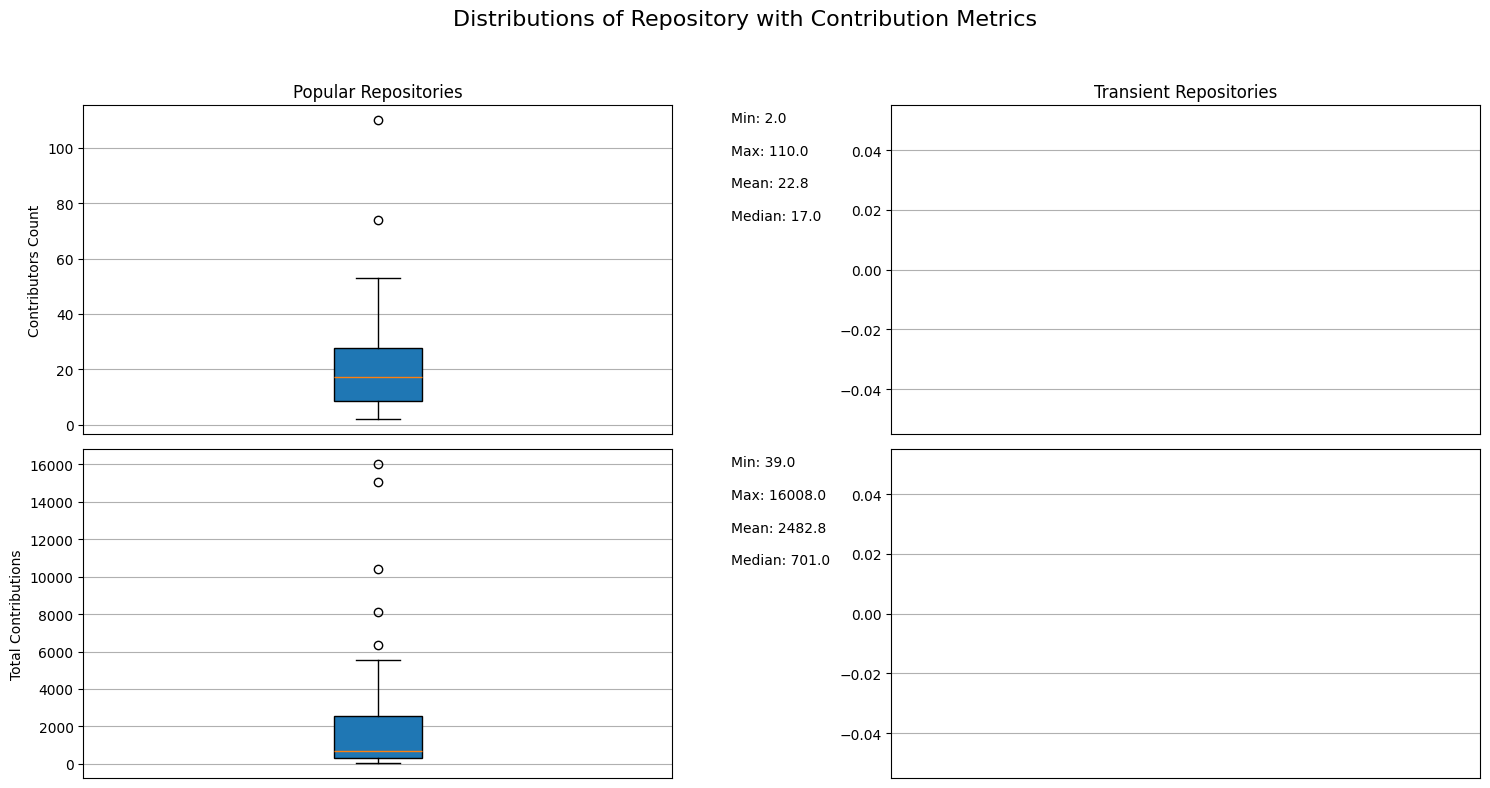

In [31]:
# Assuming metrics, repos_types, and repos_labels are already defined
metrics = ['contributors_count', 'total_contributions']
repos_types = [popular_repos, transient_repos,]
repos_labels = ['Popular Repositories', 'Transient Repositories']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))  # Adjust the size as necessary

# Set a title for the figure
fig.suptitle('Distributions of Repository with Contribution Metrics', fontsize=16)

# Plot each boxplot and annotate statistics
for i, metric in enumerate(metrics):
    for j, repo_type in enumerate(repos_types):
        # Convert data to numeric and drop NaN values
        numeric_data = pd.to_numeric(repo_type[metric], errors='coerce').dropna()

        # Create the boxplot
        boxplot = axes[i, j].boxplot(numeric_data, patch_artist=True)
        
        # Calculate statistics
        median = np.median(numeric_data)
        mean = np.mean(numeric_data)
        maximum = np.max(numeric_data)
        minimum = np.min(numeric_data)

        # Set titles and labels
        if i == 0:
            axes[i, j].set_title(repos_labels[j])
        if j == 0:
            axes[i, j].set_ylabel(f'{metric.replace("_", " ").title()}')

        # Annotate statistics on the plot
        axes[i, j].annotate(f'Median: {median:.1f}', xy=(1, median), xytext=(1.1, 0.65), textcoords='axes fraction', ha='left')
        axes[i, j].annotate(f'Mean: {mean:.1f}', xy=(1, mean), xytext=(1.1, 0.75), textcoords='axes fraction', ha='left')
        axes[i, j].annotate(f'Max: {maximum}', xy=(1, maximum), xytext=(1.1, 0.85), textcoords='axes fraction', ha='left')
        axes[i, j].annotate(f'Min: {minimum}', xy=(1, minimum), xytext=(1.1, 0.95), textcoords='axes fraction', ha='left')
        
        # Add grid and remove x-ticks
        axes[i, j].grid(True)
        axes[i, j].set_xticks([])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rectangle in which to fit subplots

# Show the plot
plt.show()


In [32]:
# popular_repos[['contributors_count', 'total_contributions']].describe(percentiles=[ 0.01, 0.05, 0.1, 0.15, 0.19, 0.2, 0.25, 0.75, 0.9,00.95,0.99])

In [33]:
# popular_repos[popular_repos['contrib_csv'].isna()]

In [34]:
# popular_repos_filtered = popular_repos[popular_repos['contrib_csv'].notnull()]

In [35]:
# popular_repos_filtered[['contributors_count', 'total_contributions']].describe(percentiles=[ 0.01, 0.05, 0.1, 0.15, 0.19, 0.2, 0.25, 0.75, 0.9,00.95,0.99,0.995])

In [36]:
# popular_repos_filtered[popular_repos_filtered['total_contributions']>20000]

In [37]:
# cluster_aggregations = popular_repos.groupby('cluster_label').agg({
#     'contributors_count': 'sum',  
#     'total_contributions': 'sum' 
# }).reset_index()

# cluster_aggregations['repos_per_cluster'] = popular_repos.groupby('cluster_label')['contributors_count'].size().reset_index(name='repos_count')['repos_count']

# cluster_aggregations

# cluster_aggregations.set_index('cluster_label', inplace=True)

# fig, ax1 = plt.subplots(figsize=(16, 6))

# cluster_aggregations['total_contributions'].plot(kind='bar', color='skyblue', ax=ax1, position=1, width=0.4, label='Total Contributions')

# ax2 = ax1.twinx()

# cluster_aggregations['contributors_count'].plot(kind='bar', color='orange', ax=ax2, position=0, width=0.4, label='Contributors Count')

# ax1.set_xlabel('Cluster Label')
# ax1.set_ylabel('Total Contributions', color='skyblue')
# ax2.set_ylabel('Contributors Count', color='orange')
# plt.title('Contributors Count and Total Contributions per Cluster')

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
# # plt.grid()
# plt.show()

In [38]:
# popular_repos_filtered[popular_repos_filtered['cluster_label']==46].sort_values(by='total_contributions', ascending=False)

In [39]:
# popular_repos_filtered.head(1)

In [40]:
# dead_repos_filtered = dead_repos[dead_repos['contrib_csv'].notnull()]

In [41]:
# dead_repos_filtered[['contributors_count', 'total_contributions']].describe(percentiles=[ 0.01, 0.05, 0.1, 0.15, 0.19, 0.2, 0.25, 0.75, 0.9,00.95,0.99])

In [42]:
# dead_repos_filtered[dead_repos_filtered['contributors_count']>15]

In [43]:
# final_data_filtered = final_data[final_data['contrib_csv'].notnull()]

In [44]:
# stars0 = final_data_filtered['stargazers_count'].tolist()
# forks0 = final_data_filtered['forks_count'].tolist()
# contributors0 = final_data_filtered['contributors_count'].tolist()
# contributions0 = final_data_filtered['total_contributions'].tolist()

# len(stars0), len(forks0), len(contributors0), len(contributions0)

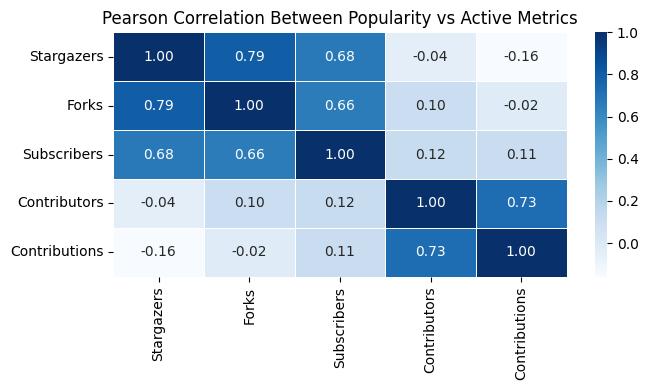

In [45]:
from sklearn.preprocessing import PowerTransformer

# Prepare the data
stars = np.array(final_data['stargazers_count']).reshape(-1,1)
forks = np.array(final_data['forks_count']).reshape(-1,1)
subscribers = np.array(final_data['subscribers_count']).reshape(-1,1)
contributors = np.array(final_data['contributors_count']).reshape(-1,1)
contributions = np.array(final_data['total_contributions']).reshape(-1,1)

# Fit and transform the data
normalized_stars = PowerTransformer().fit_transform(stars)
normalized_forks = PowerTransformer().fit_transform(forks)
normalized_subscribers = PowerTransformer().fit_transform(subscribers)
normalized_contributors = PowerTransformer().fit_transform(contributors)
normalized_contributions = PowerTransformer().fit_transform(contributions)

# Create DataFrame using normalized data
df0 = pd.DataFrame({
    'Stargazers': normalized_stars.flatten(),  # Flatten the arrays to 1D
    'Forks': normalized_forks.flatten(),
    'Subscribers': normalized_subscribers.flatten(),
    'Contributors': normalized_contributors.flatten(),
    'Contributions': normalized_contributions.flatten()
})

# Calculate the Pearson correlation matrix
correlation_matrix_pearson = df0.corr(method='pearson')

# Plotting Pearson Correlation Heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Between Popularity vs Active Metrics')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [46]:
import statsmodels.api as sm

X = normalized_contributors  # Independent variable
y = normalized_stars  # Dependent variable
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())


MissingDataError: exog contains inf or nans

## Category Analysis
### Objective: Evaluate the metrics (popularity + activity) of repositories within each group to identify if certain topics are popular or active.

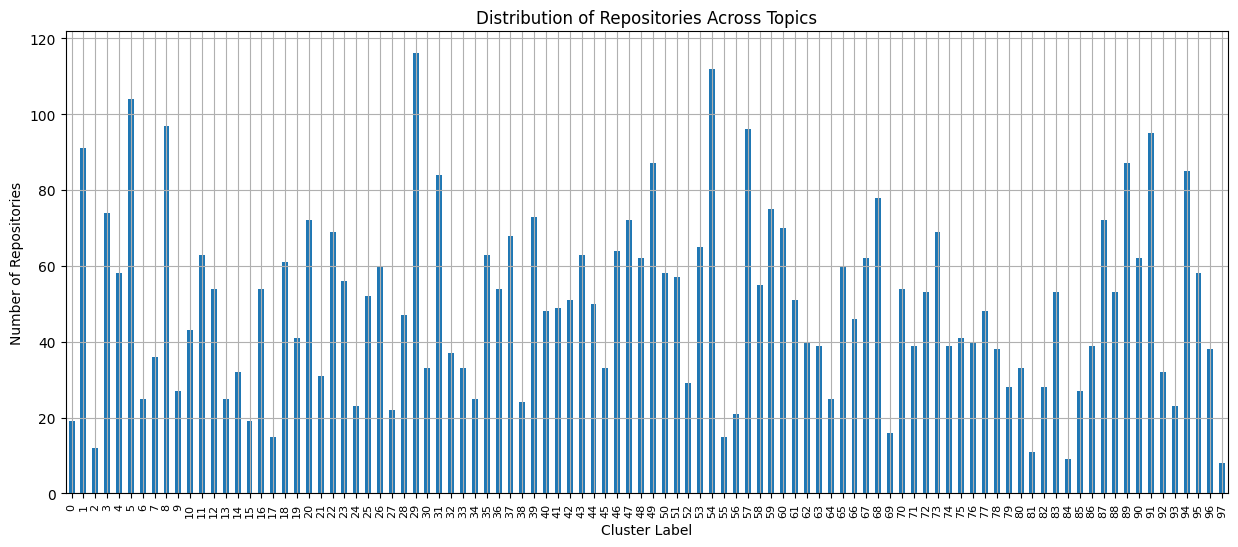

In [47]:
repo_counts_per_cluster = final_data['cluster_label'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
repo_counts_per_cluster.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.title('Distribution of Repositories Across Topics')
plt.grid(True)
plt.xticks(fontsize=8, rotation=90)
plt.show()

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\848475308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, 'Repo Type'] = np.where(


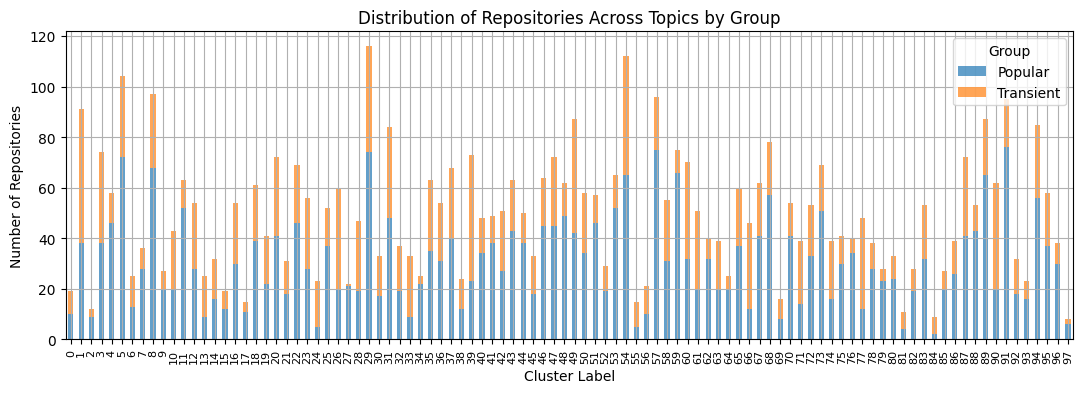

In [48]:
final_data.loc[:, 'Repo Type'] = np.where(
    final_data['full_name'].isin(popular_repos['full_name']), 'Popular', 'Transient')

# colors = ['blue', 'green', 'orange']
cluster_group_counts = final_data.groupby(['cluster_label', 'Repo Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(13, 4))  # Create a figure and a set of subplots with custom dimensions.
cluster_group_counts.plot(kind='bar', stacked=True, ax=ax, alpha=0.7) 
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.title('Distribution of Repositories Across Topics by Group')
plt.grid(True)
plt.xticks(fontsize=8, rotation=90)
plt.legend(title='Group', loc='upper right')
plt.show()

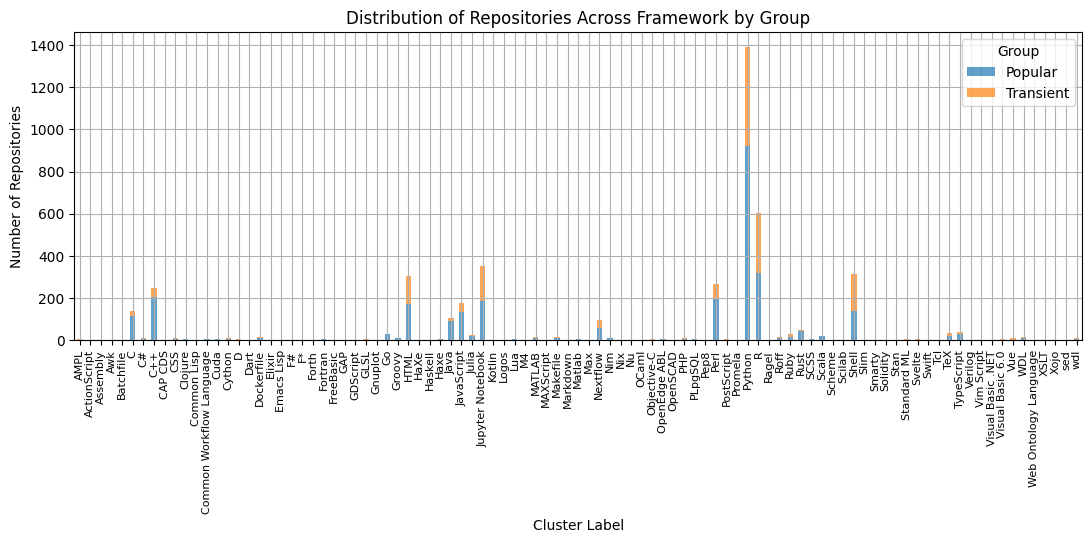

In [49]:
cluster_group_counts = final_data.groupby(['_language', 'Repo Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(13, 4))  # Create a figure and a set of subplots with custom dimensions.
cluster_group_counts.plot(kind='bar', stacked=True, ax=ax, alpha=0.7) 
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.title('Distribution of Repositories Across Framework by Group')
plt.grid(True)
plt.xticks(fontsize=8, rotation=90)
plt.legend(title='Group', loc='upper right')
plt.show()

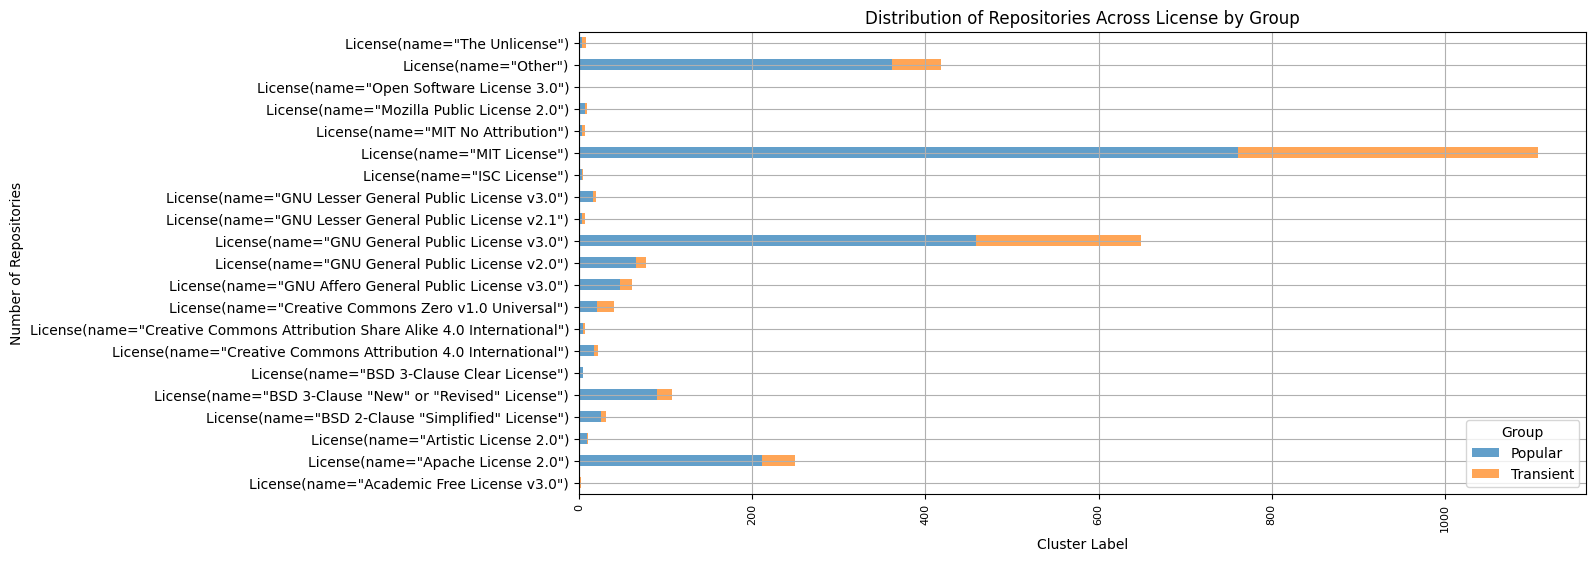

In [50]:
cluster_group_counts = final_data.groupby(['_license', 'Repo Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(13, 6))  # Create a figure and a set of subplots with custom dimensions.
cluster_group_counts.plot(kind='barh', stacked=True, ax=ax, alpha=0.7) 
plt.xlabel('Cluster Label')
plt.ylabel('Licence')
plt.title('Distribution of Repositories Across License by Group')
plt.grid(True)
plt.xticks(fontsize=8, rotation=90)
plt.legend(title='Group', loc='lower right')
plt.show()

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\218634677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['created_at'] = final_data['created_at'].dt.tz_localize(None)
C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\218634677.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['old_days'] = (today - final_data['created_at']).dt.days
C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_25460\218634677.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

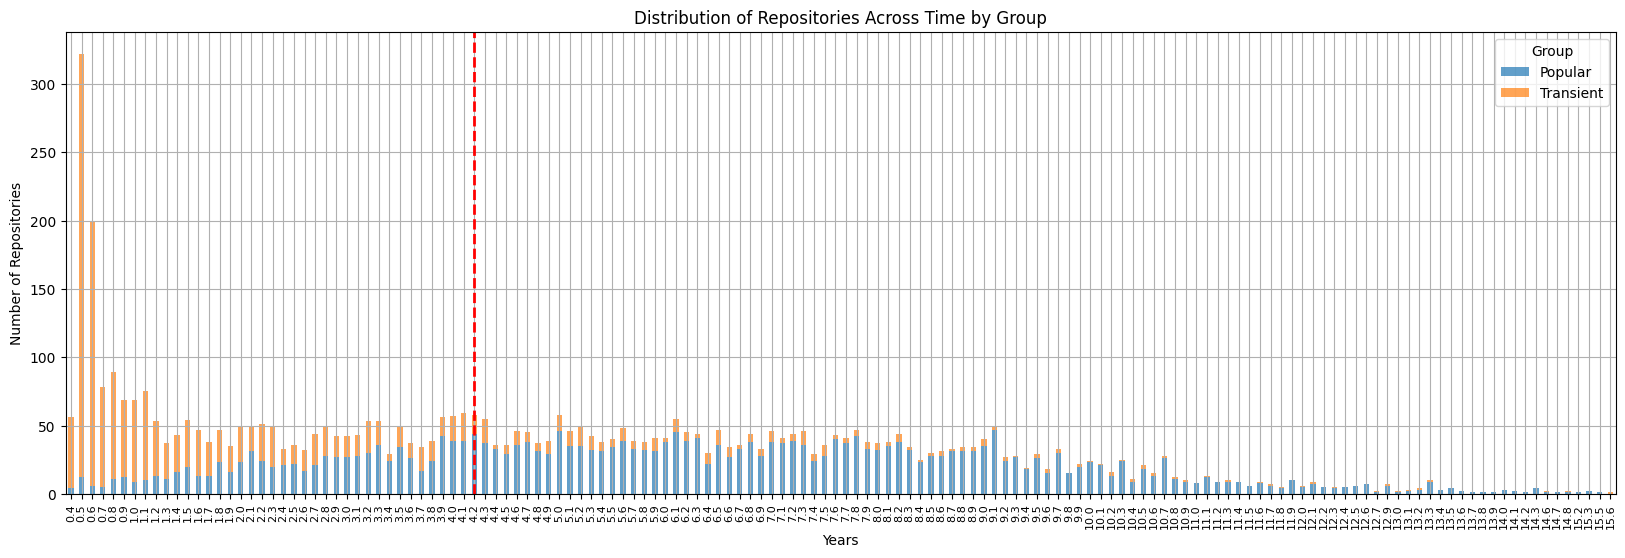

In [102]:
from datetime import datetime

final_data['created_at'] = pd.to_datetime(final_data['created_at'])
final_data['created_at'] = final_data['created_at'].dt.tz_localize(None)

# Or if you are dealing with timezone-aware datetimes and need to convert all to the same timezone, for example, UTC:
# final_data['created_at'] = final_data['created_at'].dt.tz_convert('UTC')

# Calculate how old each repo is in days
today = datetime.now()

# Calculate the difference in days
final_data['old_days'] = (today - final_data['created_at']).dt.days

# Optionally, to express it in years
final_data['old_years'] = round(final_data['old_days'] / 365.25, 1)

# print(final_data['old_years'].describe())

cluster_group_counts = final_data.groupby(['old_years', 'Repo Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(20, 6))  # Create a figure and a set of subplots with custom dimensions.
cluster_group_counts.plot(kind='bar', stacked=True, ax=ax, alpha=0.7) 
plt.xlabel('Years')
plt.ylabel('Number of Repositories')
plt.title('Distribution of Repositories Across Time by Group')
plt.grid(True)
plt.xticks(fontsize=8, rotation=90)
plt.legend(title='Group', loc='upper right')

# ax.axvline(x=4.3, color='black', linestyle='--', linewidth=2)
ax.axvline(x=38.0, color='red', linestyle='--', linewidth=2)

plt.show()

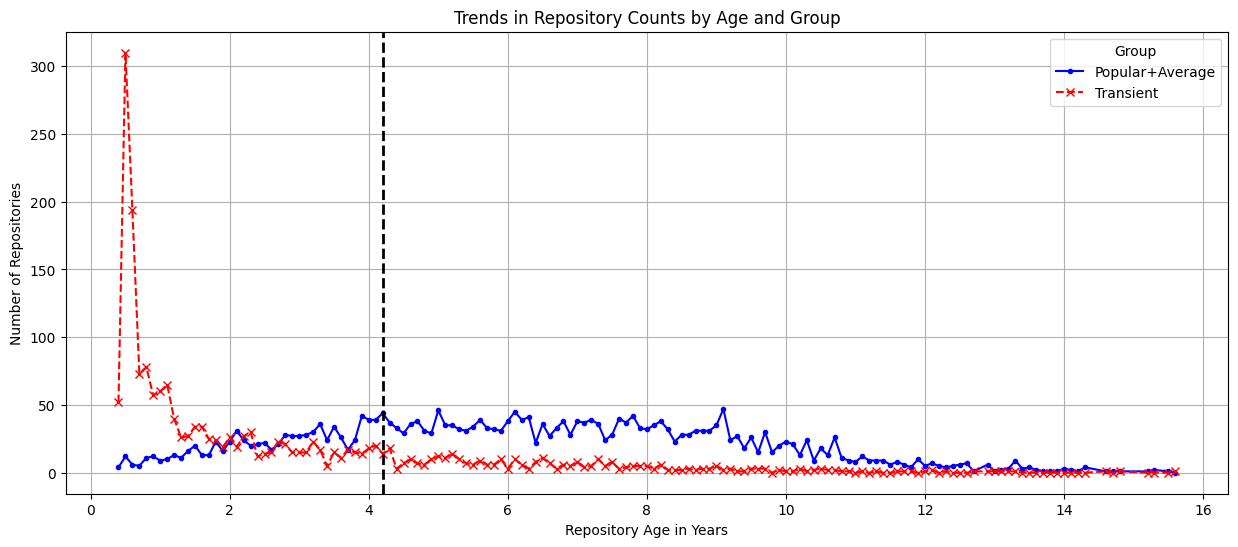

In [99]:

fig, ax = plt.subplots(figsize=(15, 6))
if 'Popular' in cluster_group_counts.columns:
    cluster_group_counts['Popular'].plot(kind='line', ax=ax, label='Popular+Average', marker='.', linestyle='-', color='blue')
if 'Transient' in cluster_group_counts.columns:
    cluster_group_counts['Transient'].plot(kind='line', ax=ax, label='Transient', marker='x', linestyle='--', color='red')

ax.axvline(x=4.2, color='black', linestyle='--', linewidth=2)
# ax.axvline(x=12.0, color='black', linestyle='--', linewidth=2)

plt.title('Trends in Repository Counts by Age and Group')
plt.xlabel('Repository Age in Years')
plt.ylabel('Number of Repositories')
plt.legend(title='Group')
plt.grid(True)
plt.xticks(rotation=0)  # Adjust rotation and fontsize if necessary
plt.show()


ValueError: exog must be a vector

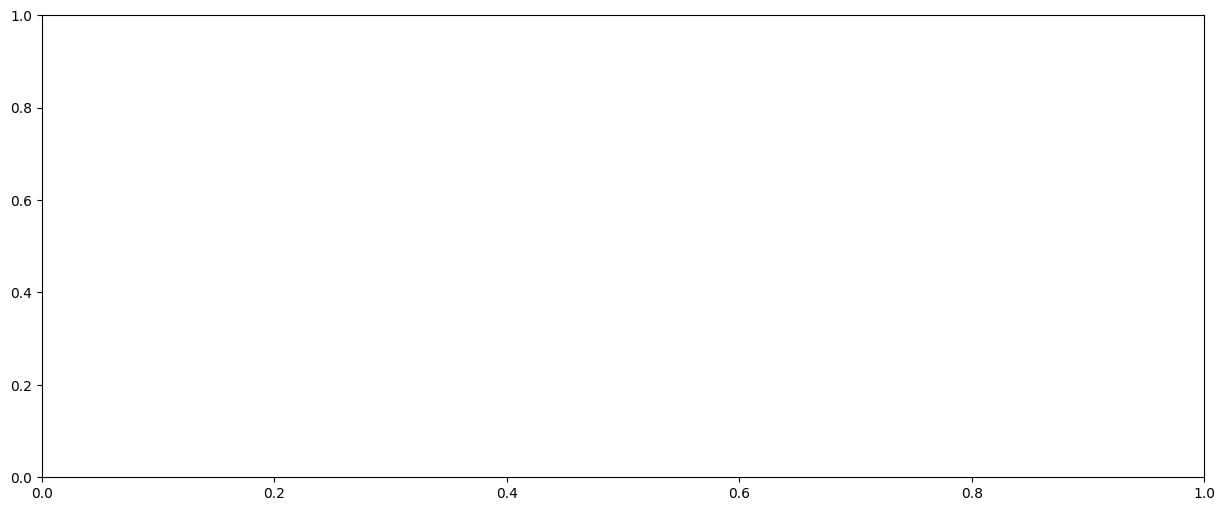

In [79]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(15, 6))

if 'Popular' in cluster_group_counts.columns:
    lowess = sm.nonparametric.lowess(cluster_group_counts['Popular'], x, frac=0.1)  # frac is the fraction of data used for smoothing
    plt.plot(lowess[:, 0], lowess[:, 1], label='Popular (LOWESS)', color='blue', linestyle='-')

if 'Transient' in cluster_group_counts.columns:
    lowess = sm.nonparametric.lowess(cluster_group_counts['Transient'], x, frac=0.1)
    plt.plot(lowess[:, 0], lowess[:, 1], label='Transient (LOWESS)', color='red', linestyle='--')

plt.title('LOWESS Smoothed Trends in Repository Counts by Age and Type')
plt.xlabel('Repository Age in Years')
plt.ylabel('Number of Repositories')
plt.legend(title='Repository Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
